<a href="https://colab.research.google.com/github/avanblerko/TIDES/blob/master/Class%20notes/Topic_4_AgentBasedModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


To start, please make your own copy of this file by clicking File -> Save as in Drive from the menu bar above

# Agent-based models

An agent-based model (ABM) is a computational model for simulating the actions and interactions of autonomous agents in order to understand the behavior of a whole system and what governs its outcomes. There are a predefined set of rules that each agent must follow, which depend on the existing state of the agent and external factors. The rules can be discrete following logical if-else statements. One usually strives to employ the most simple set of rules sufficient to accurately describe the complexity of the desired system. Compared to the macroscopic ODE/PDE models we've learned so far, ABMs are considered microscopic modeling, since they deal with agents directly and are thus more common in a bottom-up approach where you build up rules from the details of your system.

The characteristics of agent-based models include:

- Agents that model intelligent behavior, usually with a simple set of rules.
- The agents are usually situated in space (or in a network), and interact with each other locally.
- They usually have imperfect, local information.
- Often there is variability between agents.
- Often there are random elements, either among the agents or in the world.

Interacting cellular biological systems, such as bacterial communities, tissues, organoids, exhibit a huge variety of phenomena, which are often not easy to understand intuitively.  Because the fundamental building blocks or units of biological systems are cells, agent-based models with cells as the individual agents are natural simulation tools to study such systems.



## Agent-based model example

Suppose we want to predict the number of COVID cases in a particular region, we can create agents representing the people in that region.
We simulate the behavior of several agents (people) where some may be wearing masks while others aren’t, some are vaccinated, some are very social while others aren’t etc. We then simulate their interactions with each other and the associated probabilities of COVID being transmitted…
After running the simulation, we are able to better understand the overall system… we see the number of infections in the population, the number of people recovered, transmission rates, whether we hit herd immunity etc. We can also analyze how the system would look like (infections, recoveries etc.) if we were to impose measures such as forced vaccinations.
The cornerstone of ABM is the ability to understand macro phenomena emerging from micro-scale behavior.

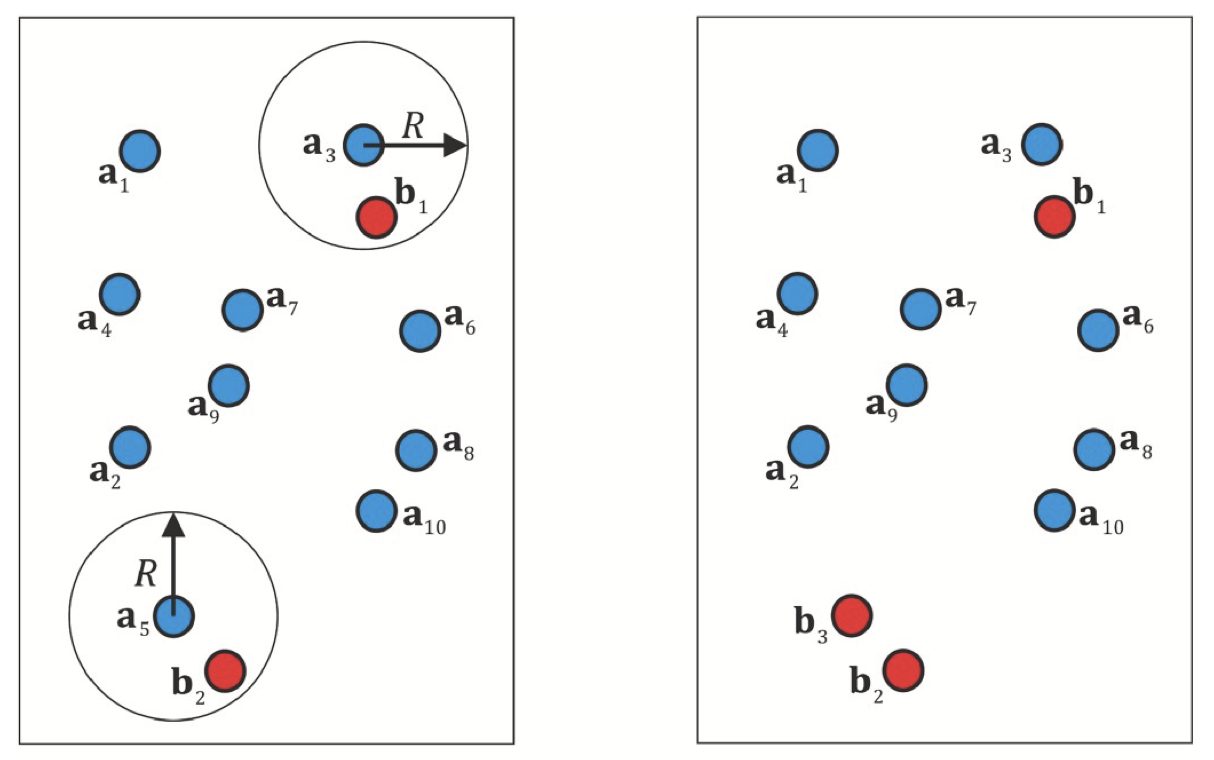



In the above image, the authors created a simple model of COVID transmission where a's are non-infected individuals and b's are individuals infected with the COVID-19 virus. The a and b agents are all able to randomly walk throughout the space. If an a and b agent come within a radius R of each other, then agent b infects agent a, turing him into a b (an infected individual). If you let this process run for a long time, you can start to watch how infections spread in a population and can plot features of the results!
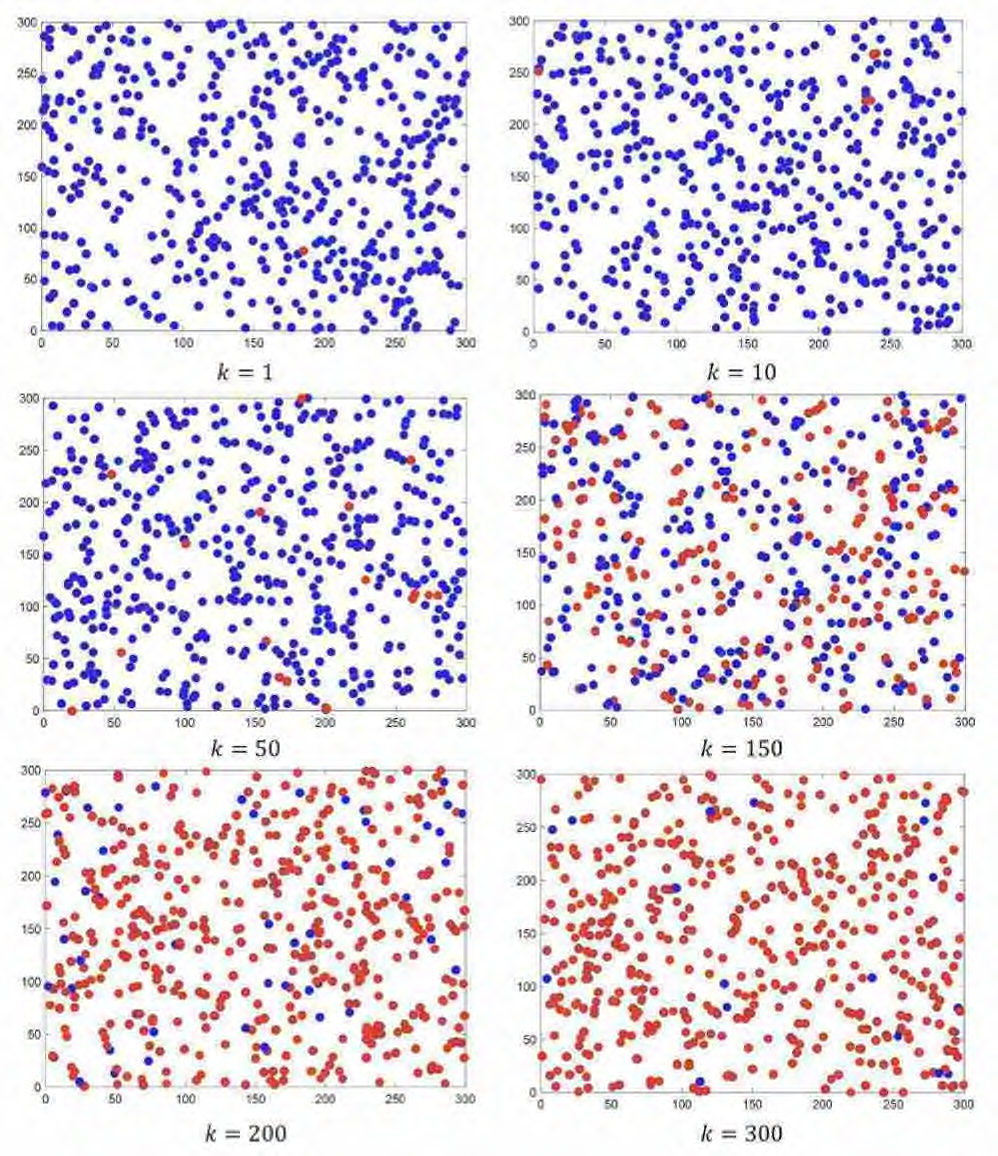

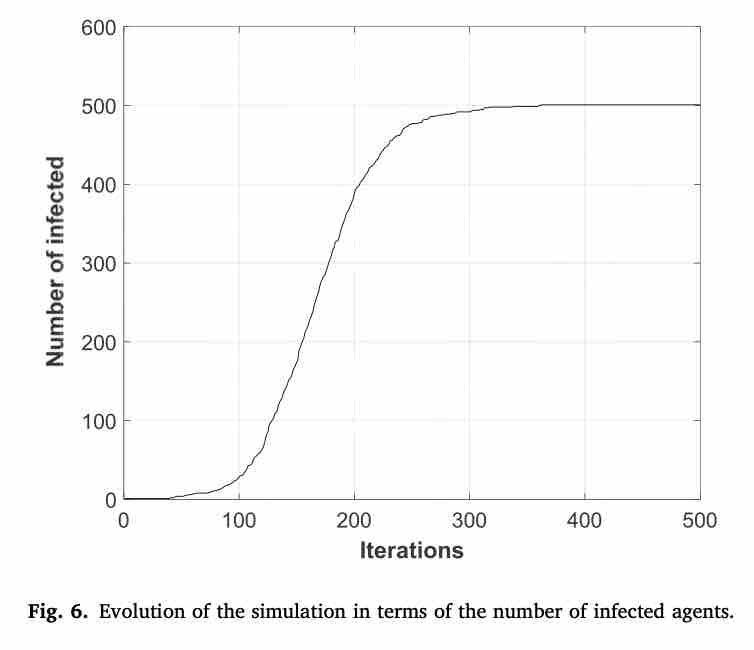

### Predator-prey model

Today - we are going to simulate the predator-prey model with an agent-based model.

Just to remind you, this is what the ODEs are for the predator-prey model (specifically, the Lotka-Volterra equations) we learned in the first week:

$\frac{dA}{dt}=R_1 A - R_3 AB$

$\frac{dB}{dt}=-R_2 B + R_4 AB$

Prey are represented by A and predators are represented by B. Let's remind ourselves what each term means. Write down your interpretation of each of the four terms in the above equations.

In the first equation, the first term states that the prey population will grow exponentially (unlimited growth) in the absence of predators. The second term states that if there is an interaction between predator and prey, that this will decrease the number of prey at some rate.

In the secod equation, the first term states that the predator population will decrease exponentially in the absense of predators. Similarly, the second term states that if there is an interaction between predator and prey, that this will increase the number of predators at some rate.

### Agent-based model for predator-prey interactions

Our goal now is to rewrite the predator-prey ODE equations into an agent-based model. Get into small groups and think through what discrete rules would you impose on your agents such that the ODE terms above are satisfied.

1. Predator and prey can move around a 2D grid like random walkers
2. Those prey that do not encounter a predator will multiply at some rate, $R_1$
3. Predators that do not encounter a prey will die (be removed from the simulation) at some rate $R_2$
4. If predator and prey meet in the same box, the prey will die (be removed from the simulation) and the predator will multiple


### A quick word about how to create an animation

We want to create animations that we can watch for this lesson. Below is a quick how-to example on how to use the FuncAnimation package in matplotlib.animation. I will show you how to create an animation of a single 1D random walker.

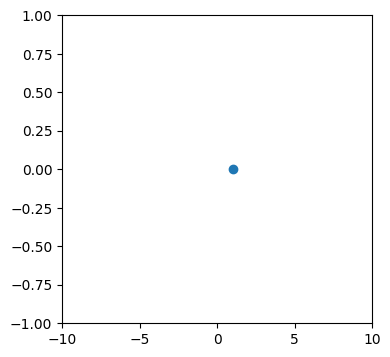

In [1]:
# everything you need to import to create an animation (and do other stuff)
import matplotlib as mpl
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import numpy as np

# needed to show the animation in this google colab notebook
from matplotlib import rc
rc('animation', html='jshtml')

xs = [0]
num_steps = 10

# initialize a figure
fig, ax = plt.subplots(figsize=(4,4))
ax.set_xlim(-10,10)
ax.set_ylim(-1,1)

# update function
# update gets fed elements from the frames parameter of FuncAnimation
# each update  clear the graph (but reapply the same x/y limits)
# then draw the points as a scatter and update the data for the next frame
# calculate the new x coordinates with a choice of step

def update(f):
    global xs
    ax.clear()
    ax.set_xlim(-10,10)
    ax.set_ylim(-1,1)
    ax.scatter(xs,0)
    xs += np.random.choice([-1,1])

#call the animation and display
ani = FuncAnimation(fig, update, interval=200, frames=range(num_steps))
ani

### Your turn!

Write code for 3 prey random walking in a 2D grid (you don't have to show the grid). Use a scatter plot to plot your prey and color the prey blue. Start each prey at a random coordinate (integer) in a square grid of length 20.

### Prey random walkers code

### Add predators random walking

Add code for 3 predators random walking in the same 2D grid. Use a scatter plot to plot your predators as well and color the predators red. Start each predator at a random coordinate (integer) in a square grid of length 20.

### Add predator random walkers code

### Add prey exponential growth

We know from the predator-prey model that our prey will exponentially grow if there are no predators around. Let's add this to our model. Discrete exponential growth can be modeled as $A(t+1) = R_1 A(t)$ where A is the number of prey at either $t+1$ or $t$ and $R_1$ is some growth rate, let's say $R_1 = 2 prey/simulation step$ for now.

### Exponential growth of prey

### Add predator exponential decay (death)

We know from the predator-prey model that our predators will exponentially decay if there are no prey around. Let's add this to our model. Discrete exponential decay can be modeled as $B(t+1) = \frac{1}{R_2} B(t)$ where B is the number of predators at either $t+1$ or $t$ and $R_2$ is some growth rate, let's say $\frac{1}{R_2} = \frac{1}{2} predators/simulation step$ for now.

### Death (exponential decay) of predators



### Add predator eating prey and prey decreasing in number and prey increasing in number

We know from the predator-prey model that when a predator and prey meet then the prey will decrease at a rate of $R_3$ and predators will increase at a rate of $R_4$. Let's simplify this for now and say that when a predator and prey meet, that the prey is killed and the predator multiplies.

### Put everything together